## IFT 3700 - 21 Décembre 2018 - Travail 2
### David Ogaus(1004183), Jonathan Caspar (20059041), Tommy Côté(1056362) et Xiuli Zhang (20039439)
------------

## Question 1
---------
Cette question est une compétition entre les équipes et sera évaluée en fonction de la précision du classifieur produit par chaque équipe. Les données sont contenues dans le fichier PATCH.amat et il s’agit de 50000 images (28 x 28) en noir et blanc codées en binaire. Les images sont abstraites et appartiennent à deux catégories distinctes. Le fichier contient une image par ligne et chaque ligne commence par 784=28 * 28 bits associés à la couleur des pixels et suivi d’un bit représentant la classe. Le codage du fichier est lisible, mais nécessite un prétraitement pour être utilisé. L’équipe doit produire un classifieur qui sera mis en production et évalué sur des données fraîches non disponibles à l’équipe (mais qui ont exactement la même distribution). Les équipes avec une solution minimalement raisonnable seront classées en ordre de précision et le rang sera transformé en note variant de 10 à 25 sur 25.

![DataShape](datashape.jpg)

### Importation du fichier PATCH.amat

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [5]:
file = open("e:\PATCH.amat")
rawData = list(file) # contient une liste de 50.000 vecteurs

In [6]:
regex = re.compile("\s*(0|1)\.") # expression régulière qui extrait chaque chiffre (0 ou 1) situé avant un point
data, label = [], []

for vector in rawData :
    parsedVector = re.findall(regex, vector)
    intVector = [int(pixel.strip()) for pixel in parsedVector]
    label.append(intVector.pop(784)) # on retire le dernier bit correspondant à la classe du vecteur et on l'ajoute dans label
    data.append(intVector) # on ajoute le vecteur de pixels (auquel on a retiré le dernier bit) dans "data"

En convertissant nos vecteurs en matrice 28 x 28, on peut visualiser quelques vecteurs de **classe 0** et de **classe 1** :

ValueError: num must be 1 <= num <= 8, not 9

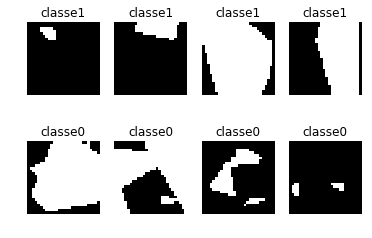

In [16]:
# Extraction d'échantillons
dataSample = [data[i] for i in range(1403,1407)] + [data[i] for i in range(40007,40015)]
labelSample = [label[i] for i in range(1403,1407)] + [label[i] for i in range(40007,40015)]

# Affichage de chaque échantillon et leurs classes respectives
for i, vector in enumerate(dataSample):
    ax = plt.subplot(2, 4, i+1)
    plt.axis('off')
    ax.set_title('classe'+str(labelSample[i]))
    matrix = np.reshape(vector, (28,28))
    plt.imshow(matrix, cmap='gray')
print(data[1])

## Question 2
---------
Imaginez qu’on vous donne un fichier contenant des données de nature astronomique. Il s’agit de données concernant 6500 milliards d’étoiles. Les données (dépassant la centaine de téraoctets) sont réparties sur **300 serveurs** avec un accès rapide au disque et une bonne capacité de calcul. La connexion entre les serveurs est rapide, mais pas exceptionnelle.

Les données pour chaque étoile comporte, la position dans l’espace (x,y,z), la luminosité apparente de l’étoile et sa catégorie (10 catégories possibles). Aussi, pour chaque étoile une liste de ses caractéristiques physiques représentées par 22 nombres réels est incluse.

Proposez une approche distribuée qui permet de répondre aux questions suivantes et expliquez en détail toute la démarche permettant leur résolution.
* Trouvez les 1000 paires d’étoiles jumelles les plus proches (distance euclidienne de la position).
* Comptez combien d'étoiles il y a dans chaque catégorie.
* Produisez un classifieur qui, étant donné le vecteur de caractéristiques (22 nombres réels), prédit la catégorie de l’étoile.


on stocker les étoiles les 
* Trouvez les 1000 paires d’étoiles jumelles les plus proches (distance euclidienne de la position).


* Comptez combien d'étoiles il y a dans chaque catégorie.
  map:catégorie est clé,nombre de cette catégoré dans ce serveur est valeur,regouper le même catégorie,reduce:fusioner les donnée ayant même clé ,et faire le totale les valeurs.
* Produisez un classifieur qui, étant donné le vecteur de caractéristiques (22 nombres réels), prédit la catégorie de l’étoile.


## Question 3
---------
Expliquez en détail comment utiliser un classifieur binaire, capable d’apprendre à effectuer la classification de deux catégories, pour réaliser la classification dans un contexte ou plusieurs catégories doivent être distinguées. Considérez le cas à 3, 25, 12500 catégories et faite le contraste entre les différentes approches étudiées et le nombre de catégories.

approche 1: on entraine m(m est le nombre de catégorie) classifieurs binaires,chaque clasifieur classifie une catégorie contre tous les autres catégories,par exemple classifieur1 classifie catégorie 1 et contre tous les autres,classifieur2 classifie catégorie 2 et contre tous les autres etc.On applique m classifieurs sur le jeux de donnée,on obtient m scores on peut choisir le score plus élevé.<br>
approche 2:on entraine m(m-1)/2 classiffiers binaires,chaque classifieur classifie une catégorie contre une,par exemple classifieur12 classifie catégorie 1 et 2,classifieur13 classifie catégorie 1 et 3,etc.On les applique sur le juex de donée,on obtient m(m-1)/2 décisions ,on peut voter le classiffier.

## Question 4
---------
Faites une analyse détaillée et exhaustive des patrons existants dans le jeu de données adulte. Il est possible que le regroupement de valeurs pour certaines caractéristiques donne des résultat intéressant. Vous devez aussi, s’il y a lieux, discuter de l’aspect éthique concernant l’utilisation des patrons obtenus.